In [38]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

url = "https://data.cityofnewyork.us/resource/xywu-7bv9.json"
response = requests.get(url)
response_json = response.json()
#print(json.dumps(response_json, indent=4, sort_keys=True))

population=[]
borough=[]
percent = []
for i in range(len(response_json)):
    p = response_json[i]["_2020"]
    b = response_json[i]["borough"]
    per = response_json[i]["_2020_boro_share_of_nyc_total"]
    population.append(p)
    borough.append(b)
    percent.append(per)


population_2020 = pd.DataFrame({"population": population, "borough": borough, "percent": percent})
population_2020

,population,borough,percent
0,8550971,NYC Total,100.00
1,1446788,Bronx,16.92
2,2648452,Brooklyn,30.97
3,1638281,Manhattan,19.16
4,2330295,Queens,27.25
5,487155,Staten Island,5.70


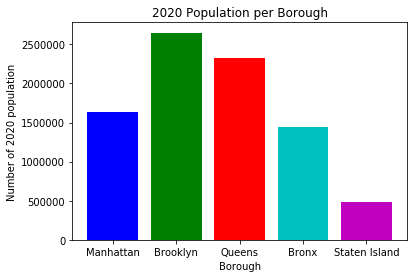

In [50]:
population_2020.iloc[1:6, 0]

Boroughs = ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]
population_2020 = [1638281, 2648452, 2330295, 1446788, 487155]
plt.bar(Boroughs, population_2020, color="bgrcmykw", align="center")
plt.title("2020 Population per Borough")
plt.xlabel("Borough")
plt.ylabel("Number of 2020 population")
plt.show()

In [75]:
AirBnb = [45.1, 40.8, 11.2, 2.1, 0.7]
Population =[19.16, 30.97, 27.25, 16.92, 5.70]
df = pd.DataFrame({'group':["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"], 'AirBnb':AirBnb , 'Population':Population })



Text(0, 0.5, 'Borough')

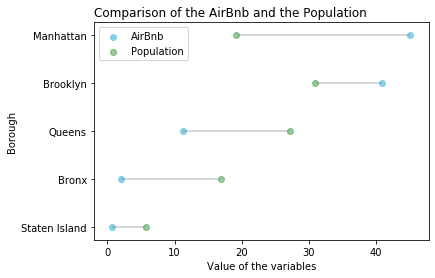

In [77]:
# Reorder it following the values of the first value:
ordered_df = df.sort_values(by='AirBnb')
my_range=range(1,len(df.index)+1)

# The vertical plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
plt.hlines(y=my_range, xmin=ordered_df['AirBnb'], xmax=ordered_df['Population'], color='grey', alpha=0.4)
plt.scatter(ordered_df['AirBnb'], my_range, color='skyblue', alpha=1, label='AirBnb')
plt.scatter(ordered_df['Population'], my_range, color='green', alpha=0.4 , label='Population')
plt.legend()

# Add title and axis names
plt.yticks(my_range, ordered_df['group'])
plt.title('Comparison of the AirBnb and the Population', loc='left')
plt.xlabel('Value of the variables')
plt.ylabel('Borough')